In [3]:
%pip install pandas numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 54.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 30.0 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 54.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 47.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 43.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.2 MB/s  0:00:00
   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  2/10 [numpy]]  WARNING: The scripts f2py and numpy-config are installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━  4/10 [fonttools]  WARNING: The scripts fonttools, pyftmerge, pyftsubset and ttx are installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

In [5]:
df = pd.read_csv('../data/Motor_Vehicle_Collisions.csv')

print(f'Raw dataset: {len(df):,} records, {df.shape[1]} columns')
print(f'Columns: {list(df.columns)}')
df.head(3)

Raw dataset: 375,025 records, 29 columns
Columns: ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,02/03/2022,16:15,QUEENS,11360.0,"40,776665","-73,78281","(40.776665, -73.78281)",KENNEDY STREET,26 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4500092,NaN,NaN,NaN,NaN,NaN
1,02/03/2022,18:51,MANHATTAN,10036.0,"40,763428","-73,99271","(40.763428, -73.99271)",WEST 48 STREET,10 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4504654,Sedan,Bike,NaN,NaN,NaN
2,02/03/2022,22:50,QUEENS,11385.0,"40,695114","-73,90322","(40.695114, -73.90322)",WYCKOFF AVENUE,NORMAN STREET,NaN,...,NaN,NaN,NaN,NaN,4504817,Pick-up Truck,NaN,NaN,NaN,NaN


In [6]:
print('=' * 60)
print('DATA QUALITY BEFORE CLEANING')
print('=' * 60)

missing_summary = df.isnull().sum()
missing_pct = (missing_summary / len(df) * 100).round(2)

quality_before = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing %': missing_pct
}).sort_values('Missing %', ascending=False)

print(quality_before[quality_before['Missing %'] > 0].to_string())
print(f'\nTotal records: {len(df):,}')

DATA QUALITY BEFORE CLEANING
                               Missing Count  Missing %
VEHICLE TYPE CODE 5                   372518      99.33
CONTRIBUTING FACTOR VEHICLE 5         372404      99.30
VEHICLE TYPE CODE 4                   366687      97.78
CONTRIBUTING FACTOR VEHICLE 4         366203      97.65
VEHICLE TYPE CODE 3                   343861      91.69
CONTRIBUTING FACTOR VEHICLE 3         341444      91.05
OFF STREET NAME                       268128      71.50
CROSS STREET NAME                     181859      48.49
VEHICLE TYPE CODE 2                   126999      33.86
ZIP CODE                              107607      28.69
BOROUGH                               107551      28.68
ON STREET NAME                        106901      28.51
CONTRIBUTING FACTOR VEHICLE 2          89148      23.77
LOCATION                               23696       6.32
LATITUDE                               23696       6.32
LONGITUDE                              23696       6.32
VEHICLE TYPE CODE 1

In [8]:
df['LATITUDE'] = pd.to_numeric(
    df['LATITUDE'].astype(str).str.replace(',', '.'),
    errors='coerce'
)
df['LONGITUDE'] = pd.to_numeric(
    df['LONGITUDE'].astype(str).str.replace(',', '.'),
    errors='coerce'
)

print('Coordinate columns converted to numeric (comma -> dot).')
print(f'Sample LATITUDE values: {df["LATITUDE"].dropna().head(3).tolist()}')
print(f'Sample LONGITUDE values: {df["LONGITUDE"].dropna().head(3).tolist()}')

Coordinate columns converted to numeric (comma -> dot).
Sample LATITUDE values: [40.776665, 40.763428, 40.695114]
Sample LONGITUDE values: [-73.78281, -73.99271, -73.90322]


In [9]:
total = len(df)
missing_both = (df['LATITUDE'].isna() & df['LONGITUDE'].isna()).sum()
has_coords = total - missing_both

print('=' * 60)
print('MISSING COORDINATES ANALYSIS')
print('=' * 60)
print(f'Total records:           {total:,}')
print(f'Missing BOTH lat/lon:    {missing_both:,} ({missing_both/total*100:.1f}%)')
print(f'Have valid coordinates:  {has_coords:,} ({has_coords/total*100:.1f}%)')

MISSING COORDINATES ANALYSIS
Total records:           375,025
Missing BOTH lat/lon:    23,696 (6.3%)
Have valid coordinates:  351,329 (93.7%)


In [10]:
NYC_LAT_MIN, NYC_LAT_MAX = 40.48, 40.92
NYC_LON_MIN, NYC_LON_MAX = -74.27, -73.68

before_count = df['LATITUDE'].notna().sum()

outside_bounds = (
    df['LATITUDE'].notna() &
    (
        (df['LATITUDE'] < NYC_LAT_MIN) | (df['LATITUDE'] > NYC_LAT_MAX) |
        (df['LONGITUDE'] < NYC_LON_MIN) | (df['LONGITUDE'] > NYC_LON_MAX)
    )
)

print(f'Records with coordinates outside NYC bounds: {outside_bounds.sum():,}')

# Set outlier coordinates to NaN
df.loc[outside_bounds, ['LATITUDE', 'LONGITUDE']] = np.nan

after_count = df['LATITUDE'].notna().sum()
print(f'Valid coordinates: {before_count:,} -> {after_count:,}')

Records with coordinates outside NYC bounds: 4,719
Valid coordinates: 351,329 -> 346,610


In [15]:
def normalize_street(s):
    """Normalize street names for consistent matching."""
    if pd.isna(s):
        return np.nan
    s = str(s).upper().strip()
    replacements = {
        ' AVENUE': ' AVE', ' STREET': ' ST', ' BOULEVARD': ' BLVD',
        ' DRIVE': ' DR', ' ROAD': ' RD', ' PLACE': ' PL',
        ' LANE': ' LN', ' COURT': ' CT', ' PARKWAY': ' PKWY',
        ' EXPRESSWAY': ' EXPY', ' TURNPIKE': ' TPKE',
    }
    for old, new in replacements.items():
        s = s.replace(old, new)
    return s

df['ON_STREET_NORM'] = df['ON STREET NAME'].apply(normalize_street)
df['CROSS_STREET_NORM'] = df['CROSS STREET NAME'].apply(normalize_street)

# Build lookup from records that HAVE coordinates
df_has_coords = df.dropna(subset=['LATITUDE', 'LONGITUDE', 'ON_STREET_NORM', 'CROSS_STREET_NORM'])

intersection_lookup = df_has_coords.groupby(
    ['ON_STREET_NORM', 'CROSS_STREET_NORM']
).agg(
    median_lat=('LATITUDE', 'median'),
    median_lon=('LONGITUDE', 'median'),
    obs_count=('LATITUDE', 'count')
).reset_index()

# Keep only intersections with 2+ observations for reliability
intersection_lookup = intersection_lookup[intersection_lookup['obs_count'] >= 2]

print(f'Intersection lookup table: {len(intersection_lookup):,} unique intersections')
print(f'(from intersections with 2+ recorded collisions)')

Intersection lookup table: 35,006 unique intersections
(from intersections with 2+ recorded collisions)


In [16]:
missing_count_before = df['LATITUDE'].isna().sum()

# --- Forward match: ON STREET + CROSS STREET ---
missing_mask = (
    df['LATITUDE'].isna() &
    df['ON_STREET_NORM'].notna() &
    df['CROSS_STREET_NORM'].notna()
)
print(f'Records missing coords with both street names: {missing_mask.sum():,}')

df_missing = df.loc[missing_mask, ['ON_STREET_NORM', 'CROSS_STREET_NORM']].copy()
merged = df_missing.merge(
    intersection_lookup[['ON_STREET_NORM', 'CROSS_STREET_NORM', 'median_lat', 'median_lon']],
    on=['ON_STREET_NORM', 'CROSS_STREET_NORM'],
    how='left'
)

found = merged['median_lat'].notna()
df.loc[merged.index[found], 'LATITUDE'] = merged.loc[found, 'median_lat'].values
df.loc[merged.index[found], 'LONGITUDE'] = merged.loc[found, 'median_lon'].values
filled_forward = found.sum()
print(f'Filled from forward intersection match: {filled_forward:,}')

# --- Reverse match: swap ON/CROSS street ---
still_missing = (
    df['LATITUDE'].isna() &
    df['ON_STREET_NORM'].notna() &
    df['CROSS_STREET_NORM'].notna()
)
df_still = df.loc[still_missing, ['ON_STREET_NORM', 'CROSS_STREET_NORM']].copy()
df_still_swapped = df_still.rename(columns={
    'ON_STREET_NORM': 'CROSS_STREET_NORM',
    'CROSS_STREET_NORM': 'ON_STREET_NORM'
})
merged_rev = df_still_swapped.merge(
    intersection_lookup[['ON_STREET_NORM', 'CROSS_STREET_NORM', 'median_lat', 'median_lon']],
    on=['ON_STREET_NORM', 'CROSS_STREET_NORM'],
    how='left'
)

found_rev = merged_rev['median_lat'].notna()
df.loc[merged_rev.index[found_rev], 'LATITUDE'] = merged_rev.loc[found_rev, 'median_lat'].values
df.loc[merged_rev.index[found_rev], 'LONGITUDE'] = merged_rev.loc[found_rev, 'median_lon'].values
filled_reverse = found_rev.sum()
print(f'Filled from reverse intersection match: {filled_reverse:,}')

Records missing coords with both street names: 11,269
Filled from forward intersection match: 3,678
Filled from reverse intersection match: 3,264


In [17]:
still_missing_zip = df['LATITUDE'].isna() & df['ZIP CODE'].notna()

# Build ZIP -> centroid lookup from records with coordinates
zip_centroids = df.dropna(subset=['LATITUDE', 'LONGITUDE', 'ZIP CODE']).groupby('ZIP CODE').agg(
    centroid_lat=('LATITUDE', 'median'),
    centroid_lon=('LONGITUDE', 'median'),
    obs_count=('LATITUDE', 'count')
).reset_index()
zip_centroids = zip_centroids[zip_centroids['obs_count'] >= 5]

df_zip = df.loc[still_missing_zip, ['ZIP CODE']].copy()
merged_zip = df_zip.merge(
    zip_centroids[['ZIP CODE', 'centroid_lat', 'centroid_lon']],
    on='ZIP CODE',
    how='left'
)

found_zip = merged_zip['centroid_lat'].notna()
df.loc[merged_zip.index[found_zip], 'LATITUDE'] = merged_zip.loc[found_zip, 'centroid_lat'].values
df.loc[merged_zip.index[found_zip], 'LONGITUDE'] = merged_zip.loc[found_zip, 'centroid_lon'].values
filled_zip = found_zip.sum()
print(f'Filled from ZIP code centroids: {filled_zip:,}')

Filled from ZIP code centroids: 8,055


In [18]:
missing_count_after = df['LATITUDE'].isna().sum()
total_filled = missing_count_before - missing_count_after

print('=' * 60)
print('GEOCODING RESULTS SUMMARY')
print('=' * 60)
print(f'Missing coordinates before:  {missing_count_before:,}')
print(f'Filled via forward match:    {filled_forward:,}')
print(f'Filled via reverse match:    {filled_reverse:,}')
print(f'Filled via ZIP centroids:    {filled_zip:,}')
print(f'Total recovered:             {total_filled:,}')
print(f'Still missing after:         {missing_count_after:,} ({missing_count_after/len(df)*100:.1f}%)')
print(f'Coordinate coverage:         {(len(df) - missing_count_after)/len(df)*100:.1f}%')

GEOCODING RESULTS SUMMARY
Missing coordinates before:  28,415
Filled via forward match:    3,678
Filled via reverse match:    3,264
Filled via ZIP centroids:    8,055
Total recovered:             1,081
Still missing after:         27,334 (7.3%)
Coordinate coverage:         92.7%


In [19]:
factor_cols = [f'CONTRIBUTING FACTOR VEHICLE {i}' for i in range(1, 6)]

print('=' * 60)
print('CONTRIBUTING FACTOR ANALYSIS')
print('=' * 60)

for col in factor_cols:
    total_non_null = df[col].notna().sum()
    unspecified = (df[col] == 'Unspecified').sum()
    if total_non_null > 0:
        print(f'\n{col}:')
        print(f'  Non-null: {total_non_null:,}')
        print(f'  "Unspecified": {unspecified:,} ({unspecified/total_non_null*100:.1f}% of non-null)')

CONTRIBUTING FACTOR ANALYSIS

CONTRIBUTING FACTOR VEHICLE 1:
  Non-null: 372,458
  "Unspecified": 92,059 (24.7% of non-null)

CONTRIBUTING FACTOR VEHICLE 2:
  Non-null: 285,877
  "Unspecified": 240,104 (84.0% of non-null)

CONTRIBUTING FACTOR VEHICLE 3:
  Non-null: 33,581
  "Unspecified": 31,259 (93.1% of non-null)

CONTRIBUTING FACTOR VEHICLE 4:
  Non-null: 8,822
  "Unspecified": 8,299 (94.1% of non-null)

CONTRIBUTING FACTOR VEHICLE 5:
  Non-null: 2,621
  "Unspecified": 2,465 (94.0% of non-null)


In [20]:
uninformative_values = ['Unspecified', '1', '80', '']

for col in factor_cols:
    df[col] = df[col].replace(uninformative_values, np.nan)

# Primary factor: Vehicle 1, fallback to Vehicle 2
df['primary_factor'] = df['CONTRIBUTING FACTOR VEHICLE 1'].fillna(
    df['CONTRIBUTING FACTOR VEHICLE 2']
)

print(f'Records with known primary factor: {df["primary_factor"].notna().sum():,} '
      f'({df["primary_factor"].notna().sum()/len(df)*100:.1f}%)')
print(f'Records with unknown factor: {df["primary_factor"].isna().sum():,}')

print('\nTop 15 Contributing Factors (cleaned):')
print(df['primary_factor'].value_counts().head(15))

Records with known primary factor: 280,399 (74.8%)
Records with unknown factor: 94,626

Top 15 Contributing Factors (cleaned):
primary_factor
Driver Inattention/Distraction                           92484
Failure to Yield Right-of-Way                            25839
Following Too Closely                                    22766
Passing or Lane Usage Improper                           16019
Unsafe Speed                                             13479
Passing Too Closely                                      12803
Other Vehicular                                          11720
Backing Unsafely                                         11318
Traffic Control Disregarded                              10493
Turning Improperly                                        8712
Driver Inexperience                                       7896
Unsafe Lane Changing                                      7676
Alcohol Involvement                                       6923
Reaction to Uninvolved Vehicle         

Factor categories distribution:
factor_category
Unknown                      94626
Distracted Driving           94414
Improper Lane Use/Passing    36651
Failure to Yield             25839
Following Too Closely        22766
Other                        21152
Speeding                     13479
Backing Unsafely             11318
Traffic Control Violation    10652
Improper Turning              8712
Driver Inexperience           7896
Impaired Driving              7185
Road Conditions               6144
Visibility Issues             4939
Pedestrian/Cyclist Error      4293
Vehicle Defect                2851
Fatigue/Drowsy                2108
Name: count, dtype: int64


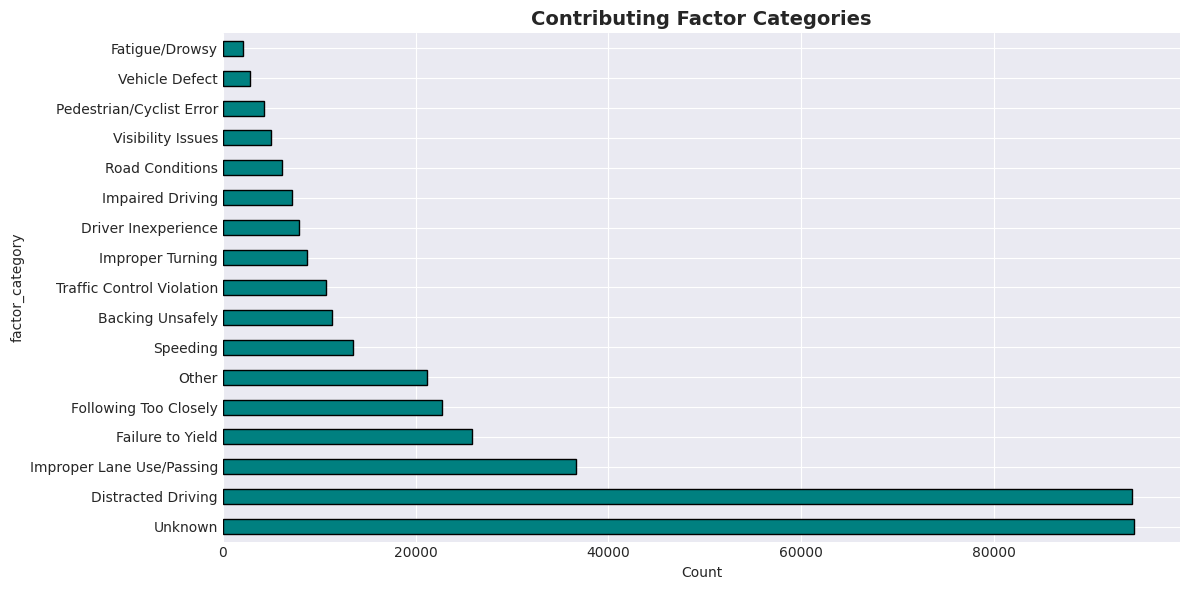

In [21]:
def categorize_factor(factor):
    """Map contributing factors into higher-level categories."""
    if pd.isna(factor):
        return 'Unknown'
    f = str(factor).lower()

    if 'inattention' in f or 'distract' in f:
        return 'Distracted Driving'
    elif 'yield' in f:
        return 'Failure to Yield'
    elif 'following too closely' in f:
        return 'Following Too Closely'
    elif 'speed' in f:
        return 'Speeding'
    elif 'lane' in f or 'passing' in f:
        return 'Improper Lane Use/Passing'
    elif 'traffic control' in f or 'signal' in f:
        return 'Traffic Control Violation'
    elif 'alcohol' in f or 'drug' in f:
        return 'Impaired Driving'
    elif 'backing' in f:
        return 'Backing Unsafely'
    elif 'turning' in f:
        return 'Improper Turning'
    elif 'pedestrian' in f or 'bicyclist' in f:
        return 'Pedestrian/Cyclist Error'
    elif 'inexperience' in f:
        return 'Driver Inexperience'
    elif 'fatigue' in f or 'sleep' in f:
        return 'Fatigue/Drowsy'
    elif 'view' in f or 'obstruct' in f or 'glare' in f:
        return 'Visibility Issues'
    elif 'pavement' in f or 'road' in f:
        return 'Road Conditions'
    elif 'brakes' in f or 'steering' in f or 'tire' in f:
        return 'Vehicle Defect'
    else:
        return 'Other'

df['factor_category'] = df['primary_factor'].apply(categorize_factor)

print('Factor categories distribution:')
print(df['factor_category'].value_counts())

# Visualize
plt.figure(figsize=(12, 6))
df['factor_category'].value_counts().plot(kind='barh', color='teal', edgecolor='black')
plt.title('Contributing Factor Categories', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [22]:
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce')

df['year'] = df['CRASH DATE'].dt.year
df['month'] = df['CRASH DATE'].dt.month
df['day_of_week'] = df['CRASH DATE'].dt.dayofweek  # 0=Monday
df['hour'] = df['CRASH TIME'].dt.hour
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

def time_period(h):
    if pd.isna(h): return 'Unknown'
    h = int(h)
    if 6 <= h < 10: return 'Morning Rush'
    elif 10 <= h < 16: return 'Midday'
    elif 16 <= h < 20: return 'Evening Rush'
    elif 20 <= h < 24: return 'Night'
    else: return 'Late Night'

df['time_period'] = df['hour'].apply(time_period)

def get_season(m):
    if pd.isna(m): return 'Unknown'
    m = int(m)
    if m in [12, 1, 2]: return 'Winter'
    elif m in [3, 4, 5]: return 'Spring'
    elif m in [6, 7, 8]: return 'Summer'
    else: return 'Fall'

df['season'] = df['month'].apply(get_season)

print('Temporal features created: year, month, day_of_week, hour, is_weekend, time_period, season')
print(f'\nTime period distribution:')
print(df['time_period'].value_counts())

Temporal features created: year, month, day_of_week, hour, is_weekend, time_period, season

Time period distribution:
time_period
Midday          114024
Evening Rush     86240
Morning Rush     61641
Night            57700
Late Night       55420
Name: count, dtype: int64


In [23]:
df['total_injured'] = df['NUMBER OF PERSONS INJURED']
df['total_killed'] = df['NUMBER OF PERSONS KILLED']
df['total_casualties'] = df['total_injured'] + df['total_killed']

df['severity'] = 'Property Damage Only'
df.loc[df['total_injured'] > 0, 'severity'] = 'Injury'
df.loc[df['total_killed'] > 0, 'severity'] = 'Fatal'

# Binary flags for modeling
df['has_injury'] = (df['total_injured'] > 0).astype(int)
df['has_fatality'] = (df['total_killed'] > 0).astype(int)
df['has_pedestrian_casualty'] = (
    (df['NUMBER OF PEDESTRIANS INJURED'] > 0) |
    (df['NUMBER OF PEDESTRIANS KILLED'] > 0)
).astype(int)
df['has_cyclist_casualty'] = (
    (df['NUMBER OF CYCLIST INJURED'] > 0) |
    (df['NUMBER OF CYCLIST KILLED'] > 0)
).astype(int)

print('Severity distribution:')
print(df['severity'].value_counts())
print(f'\nPedestrian casualty rate: {df["has_pedestrian_casualty"].mean()*100:.1f}%')
print(f'Cyclist casualty rate: {df["has_cyclist_casualty"].mean()*100:.1f}%')

Severity distribution:
severity
Property Damage Only    217750
Injury                  156272
Fatal                     1003
Name: count, dtype: int64

Pedestrian casualty rate: 9.5%
Cyclist casualty rate: 5.5%


In [24]:
def clean_vehicle_type(vtype):
    """Standardize vehicle types into clean categories."""
    if pd.isna(vtype):
        return 'Unknown'
    v = str(vtype).upper().strip()

    if 'SEDAN' in v:
        return 'Sedan'
    elif 'SPORT UTILITY' in v or 'SUV' in v or 'STATION WAGON' in v:
        return 'SUV/Station Wagon'
    elif 'TAXI' in v or 'CAB' in v:
        return 'Taxi'
    elif 'BUS' in v:
        return 'Bus'
    elif 'PICK' in v:
        return 'Pickup Truck'
    elif 'BOX TRUCK' in v or 'TRACTOR' in v or ('TRUCK' in v and 'PICK' not in v):
        return 'Truck'
    elif v == 'BIKE':
        return 'Bicycle'
    elif 'E-BIKE' in v or 'E-SCOOTER' in v or 'E BIKE' in v:
        return 'E-Bike/E-Scooter'
    elif 'MOTORCYCLE' in v:
        return 'Motorcycle'
    elif 'MOPED' in v:
        return 'Moped'
    elif 'AMBULANCE' in v or 'FIRE' in v:
        return 'Emergency Vehicle'
    else:
        return 'Other'

df['vehicle_type_clean'] = df['VEHICLE TYPE CODE 1'].apply(clean_vehicle_type)

print('Vehicle type distribution (cleaned):')
print(df['vehicle_type_clean'].value_counts())

Vehicle type distribution (cleaned):
vehicle_type_clean
Sedan                171465
SUV/Station Wagon    128747
Other                 11118
Taxi                  10783
Truck                  9963
Pickup Truck           8823
Bus                    7234
Bicycle                7068
Unknown                6092
E-Bike/E-Scooter       4800
Motorcycle             3739
Moped                  2670
Emergency Vehicle      2523
Name: count, dtype: int64


In [25]:
zip_borough = df.dropna(subset=['BOROUGH', 'ZIP CODE']).groupby('ZIP CODE')['BOROUGH'].agg(
    lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else np.nan
).to_dict()

borough_before = df['BOROUGH'].isna().sum()

df['BOROUGH'] = df.apply(
    lambda row: zip_borough.get(row['ZIP CODE'], row['BOROUGH'])
    if pd.isna(row['BOROUGH']) else row['BOROUGH'],
    axis=1
)

borough_after = df['BOROUGH'].isna().sum()
print(f'Borough missing: {borough_before:,} -> {borough_after:,}')
print(f'Recovered {borough_before - borough_after:,} borough values from ZIP codes')

Borough missing: 107,551 -> 107,551
Recovered 0 borough values from ZIP codes


In [26]:
vehicle_type_cols = [f'VEHICLE TYPE CODE {i}' for i in range(1, 6)]
df['num_vehicles'] = df[vehicle_type_cols].notna().sum(axis=1)

print('Number of vehicles involved:')
print(df['num_vehicles'].value_counts().sort_index())

Number of vehicles involved:
num_vehicles
0      6090
1    120911
2    216860
3     22826
4      5831
5      2507
Name: count, dtype: int64


In [27]:
analysis_columns = [
    # ID
    'COLLISION_ID',
    # Temporal
    'CRASH DATE', 'year', 'month', 'day_of_week', 'hour',
    'is_weekend', 'time_period', 'season',
    # Spatial
    'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
    'ON STREET NAME', 'CROSS STREET NAME',
    # Casualties
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
    'total_injured', 'total_killed', 'total_casualties',
    # Severity
    'severity', 'has_injury', 'has_fatality',
    'has_pedestrian_casualty', 'has_cyclist_casualty',
    # Factors
    'primary_factor', 'factor_category',
    'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
    # Vehicle
    'vehicle_type_clean', 'num_vehicles',
    'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
]

analysis_columns = [c for c in analysis_columns if c in df.columns]
df_clean = df[analysis_columns].copy()

print(f'Analysis-ready dataset: {len(df_clean):,} records, {df_clean.shape[1]} columns')

Analysis-ready dataset: 375,025 records, 39 columns


In [28]:
print('=' * 60)
print('FINAL DATA QUALITY REPORT')
print('=' * 60)

print(f'\nTotal records: {len(df_clean):,}')
print(f'Date range: {df_clean["CRASH DATE"].min().date()} to {df_clean["CRASH DATE"].max().date()}')

print(f'\nCoordinate coverage: {df_clean["LATITUDE"].notna().sum():,}/{len(df_clean):,} '
      f'({df_clean["LATITUDE"].notna().sum()/len(df_clean)*100:.1f}%)')
print(f'Borough coverage:    {df_clean["BOROUGH"].notna().sum():,}/{len(df_clean):,} '
      f'({df_clean["BOROUGH"].notna().sum()/len(df_clean)*100:.1f}%)')
print(f'Factor coverage:     {df_clean["primary_factor"].notna().sum():,}/{len(df_clean):,} '
      f'({df_clean["primary_factor"].notna().sum()/len(df_clean)*100:.1f}%)')

print(f'\nSeverity distribution:')
print(df_clean['severity'].value_counts().to_string())

print(f'\nRemaining missing values in key columns:')
for col in ['LATITUDE', 'BOROUGH', 'primary_factor', 'hour']:
    m = df_clean[col].isna().sum()
    print(f'  {col}: {m:,} ({m/len(df_clean)*100:.1f}%)')

FINAL DATA QUALITY REPORT

Total records: 375,025
Date range: 2022-02-03 to 2026-01-30

Coordinate coverage: 347,691/375,025 (92.7%)
Borough coverage:    267,474/375,025 (71.3%)
Factor coverage:     280,399/375,025 (74.8%)

Severity distribution:
severity
Property Damage Only    217750
Injury                  156272
Fatal                     1003

Remaining missing values in key columns:
  LATITUDE: 27,334 (7.3%)
  BOROUGH: 107,551 (28.7%)
  primary_factor: 94,626 (25.2%)
  hour: 0 (0.0%)


In [29]:
output_path = '../data/collisions_clean.csv'
df_clean.to_csv(output_path, index=False)
print(f'Cleaned dataset saved to: {output_path}')
print(f'Shape: {df_clean.shape[0]:,} rows x {df_clean.shape[1]} columns')

Cleaned dataset saved to: ../data/collisions_clean.csv
Shape: 375,025 rows x 39 columns
